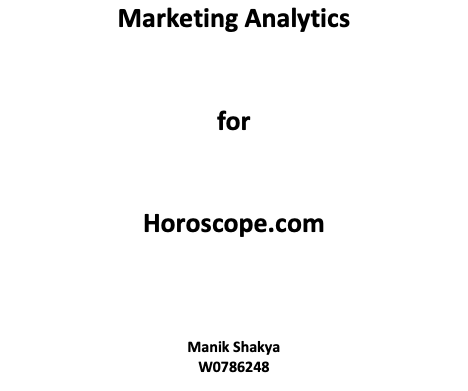









# <strong>Introduction</strong>

As the world becomes increasingly interested in astrology and spirituality, horoscope.com has the opportunity to capitalize on this trend and expand its reach. With a wealth of data at our fingertips, we can analyze user behavior and preferences to inform targeted marketing campaigns and drive engagement on the site. By leveraging insights from this data, we can better understand our audience and tailor our messaging to meet their needs, ultimately increasing site traffic, revenue, and brand recognition. In this proposal, we will outline the key findings from our analysis and provide recommendations for how to use this information to improve horoscope.com's marketing strategy.

# Research Objectives

1. Analyze the overall trend of user engagement over time, and identify any patterns or fluctuations in engagement.
2. Compare user engagement across different countries and regions, and identify any variations in engagement levels or trends.
3. Identify the top-performing countries in terms of user engagement, and determine the factors that contribute to their success.
4. Explore the relationship between user engagement and other factors, such as seasonality or the type of horoscope content being offered.
5. Identify any potential areas for improvement in terms of user engagement, and make recommendations for changes to the website or marketing strategies to increase engagement levels.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_csv('horoscope_data.csv')

In [3]:
# Check the data
print(df.head())

         Week  United States  United Kingdom  South Africa  Philippines  \
0  22/04/2018             75               0             0           66   
1  29/04/2018            100              27            79            0   
2  06/05/2018             86              18             0           47   
3  13/05/2018             65               0            26            0   
4  20/05/2018             76              43             0            0   

   Pakistan  Norway  Nigeria  Netherlands  Ireland  India  Germany  France  \
0         0      23        0           37        0     39        0      31   
1         0       0       15            0       79     42       28      27   
2         0       0       21            0        0     24        0      28   
3         0       0        0           32        0     30       27      40   
4         0       0       28            0        0     33       23       0   

   Ethiopia  Denmark  Canada  Cameroon  Bolivia  Australia  Spain  
0         0 

### Descriptive Analysis

In [4]:
# Calculate descriptive statistics for each country
stats = df.describe()

In [5]:
print(stats)

       United States  United Kingdom  South Africa  Philippines    Pakistan  \
count     260.000000      260.000000    260.000000   260.000000  260.000000   
mean       50.919231       26.980769     13.326923     9.323077    8.903846   
std        12.050938       22.643528     18.947521    17.260312   16.553015   
min        18.000000        0.000000      0.000000     0.000000    0.000000   
25%        42.000000        0.000000      0.000000     0.000000    0.000000   
50%        51.000000       25.000000      0.000000     0.000000    0.000000   
75%        58.000000       41.250000     24.250000    16.000000   16.000000   
max       100.000000      100.000000    100.000000   100.000000  100.000000   

           Norway     Nigeria  Netherlands     Ireland       India  \
count  260.000000  260.000000   260.000000  260.000000  260.000000   
mean     6.380769    8.726923    11.238462   11.273077   36.580769   
std     15.515754   13.478656    21.262036   20.412504   20.198752   
min     

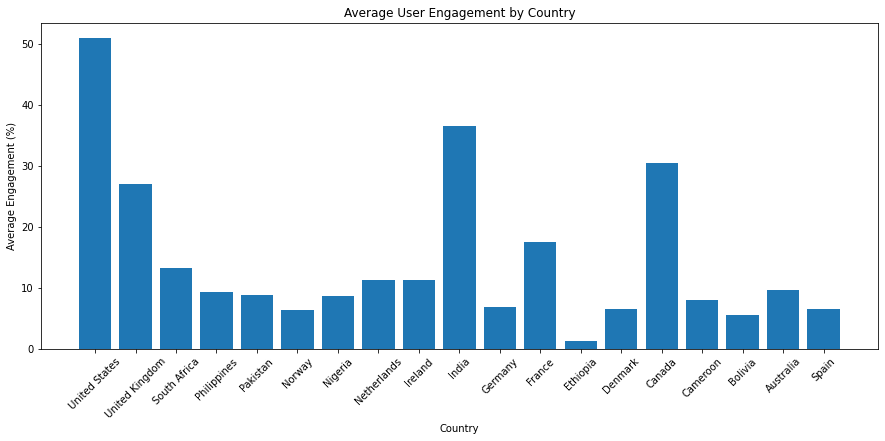

In [6]:
# Remove count, min and max rows
desc_stats = stats.drop(['count', 'min', 'max'])

# Transpose the data for plotting
desc_stats = desc_stats.transpose()

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar chart of the mean values for each country
plt.bar(desc_stats.index, desc_stats['mean'])

# Set chart title and labels
plt.title('Average User Engagement by Country')
plt.xlabel('Country')
plt.ylabel('Average Engagement (%)')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

We can see a bar chart that displays the average engagement percentage for each country. The chart is based on the descriptive statistics calculated from the dataset.

In [7]:
import statsmodels.api as sm

### Regression Analysis

Regression analysis is a useful statistical tool for analyzing the relationship between two or more variables. It can be used to explore the relationship between time (represented by the date) and user engagement (represented by the values in the other columns). By performing a regression analysis, we can determine whether there is a significant relationship between time and user engagement, and if so, we can quantify the strength of that relationship.

Regression analysis can also be used to make predictions about future user engagement based on past trends. This can be especially useful for businesses or organizations that rely on user engagement to drive revenue or achieve other goals. By analyzing trends in user engagement over time and using regression analysis to make predictions, businesses can better understand their audience and make informed decisions about how to engage with them.

Below is the regression analysis between United States and United Kingdom.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [9]:
# Set the predictor variable (x) and the response variable (y)
x = df['United States']
y = df['United Kingdom']

# Add a constant to the predictor variable
x = sm.add_constant(x)

# Create the linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         United Kingdom   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3078
Date:                Wed, 19 Apr 2023   Prob (F-statistic):              0.580
Time:                        22:28:59   Log-Likelihood:                -1179.4
No. Observations:                 260   AIC:                             2363.
Df Residuals:                     258   BIC:                             2370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.6782      6.117      3.871

In [10]:
# Convert the first column to datetime
df['Week'] = pd.to_datetime(df['Week'], infer_datetime_format=True)

# Set the date column as the index
df.set_index('Week', inplace=True)

In [11]:
# Create a list of the country names
countries = list(df.columns)

### Data Visualizations

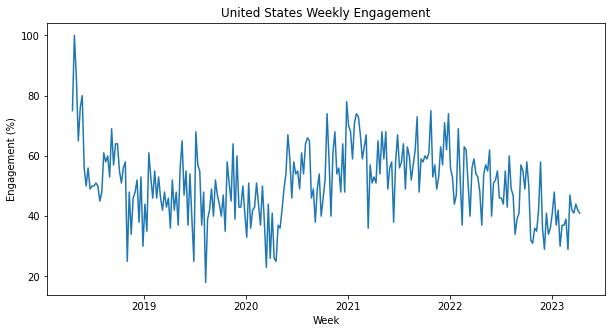

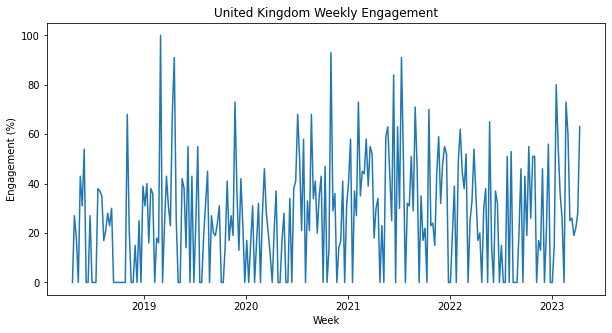

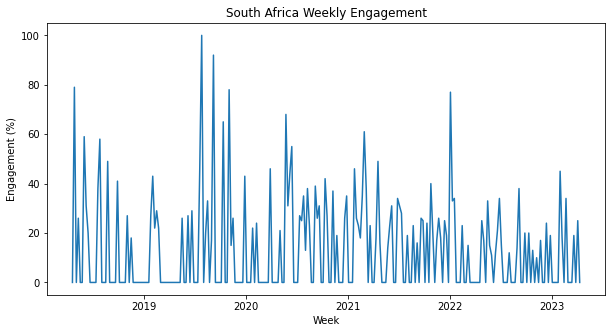

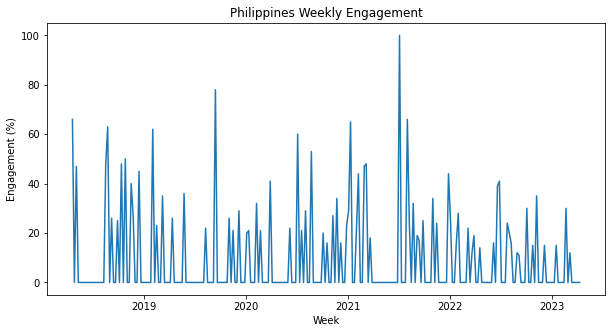

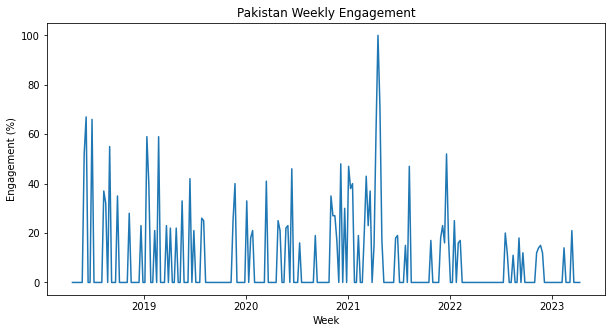

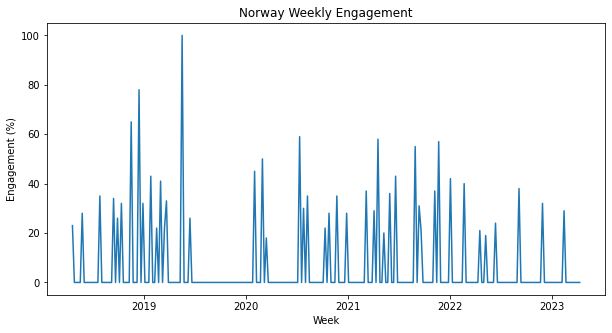

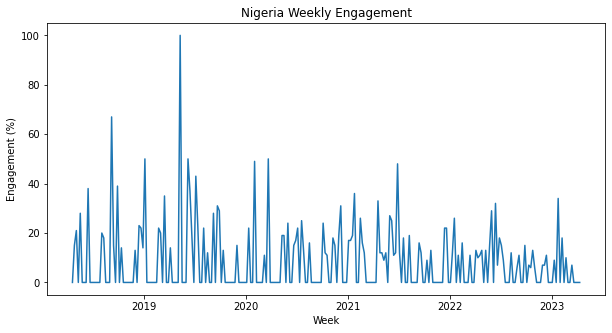

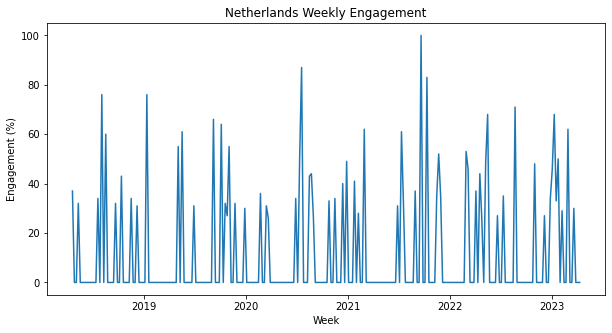

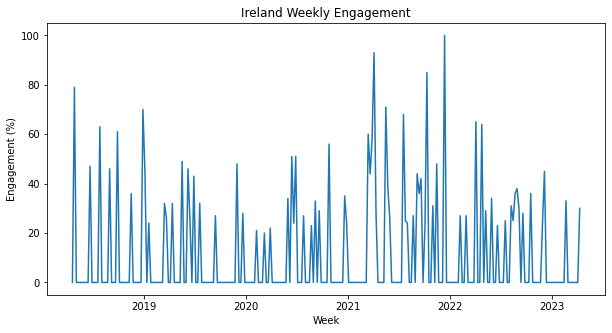

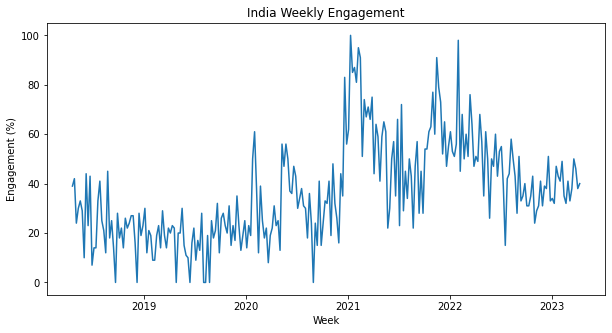

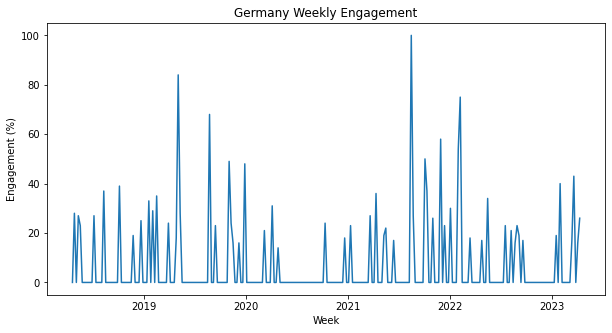

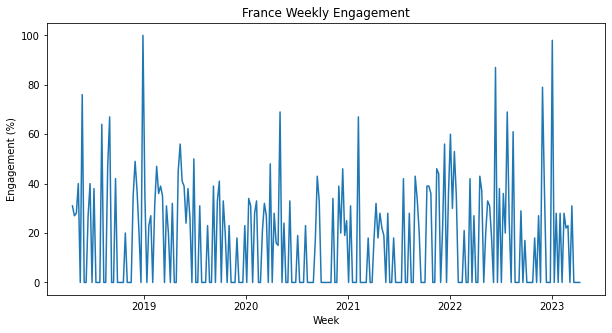

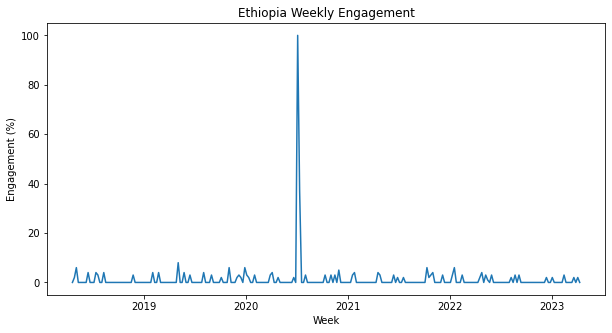

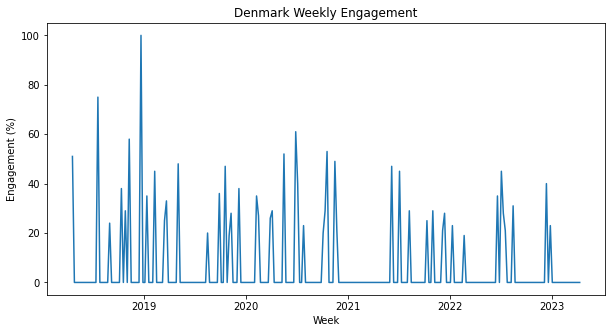

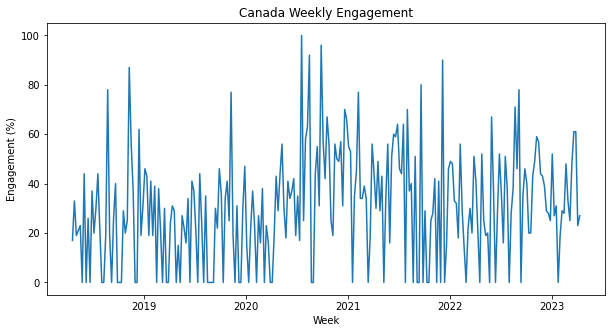

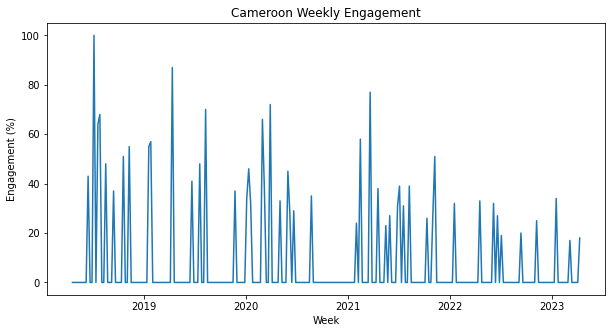

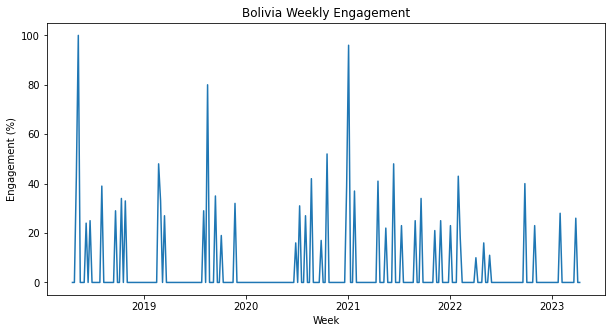

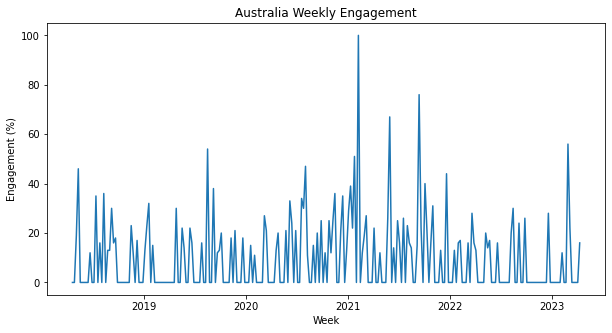

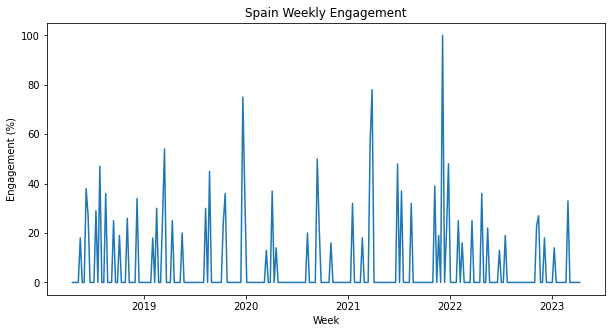

In [12]:
# Create a line chart for each country
for country in countries:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[country])
    plt.title(country + ' Weekly Engagement')
    plt.xlabel('Week')
    plt.ylabel('Engagement (%)')
    plt.show()

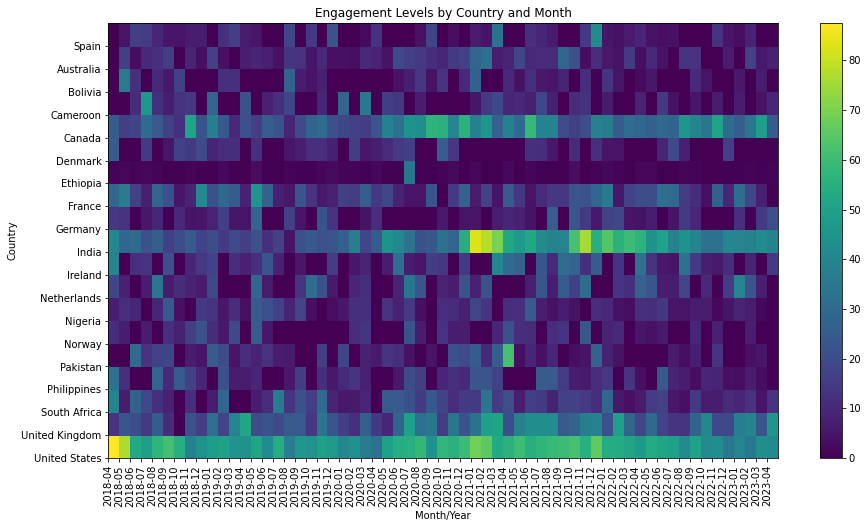

In [13]:
# Convert the data type of the values to float
df = df.astype(float)

# Resample the dataframe to monthly frequency and calculate the mean engagement levels
df_monthly = df.resample('M').mean()

# Format the index to month/year format
df_monthly.index = df_monthly.index.strftime('%Y-%m')

# Create a heatmap of the engagement levels by country and month
plt.figure(figsize=(15, 8))
plt.pcolor(df_monthly.T)
plt.yticks(range(0, len(df_monthly.columns)), df_monthly.columns)
plt.xticks(range(0, len(df_monthly.index)), df_monthly.index, rotation=90)
plt.colorbar()
plt.title('Engagement Levels by Country and Month')
plt.xlabel('Month/Year')
plt.ylabel('Country')
plt.show()

#### Insights

1. The heatmap shows the engagement levels of users in different countries over time. It is clear that some countries, such as the United States, the United Kingdom, and South Africa, consistently have higher engagement levels than others.

2. The heatmap also shows that engagement levels vary over time, with some weeks having higher engagement levels than others. For example, in the United States, there is a noticeable spike in engagement levels in early November 2018.

3. Based on the heatmap, it may be worth investigating why certain countries consistently have higher engagement levels than others. Are there cultural or demographic factors that explain this trend? Is there something about the content or marketing strategy that resonates particularly well with users in these countries?

4. It may also be worth investigating the factors that drive spikes in engagement levels. Is there a particular type of content or promotion that tends to drive engagement? Are there external factors, such as holidays or events, that tend to boost engagement levels?

5. Finally, it may be useful to conduct a more detailed analysis of engagement patterns over time. For example, are there certain days of the week or times of day when engagement levels tend to be higher? Are there seasonal or cyclical patterns in engagement levels that can be leveraged for more effective marketing?

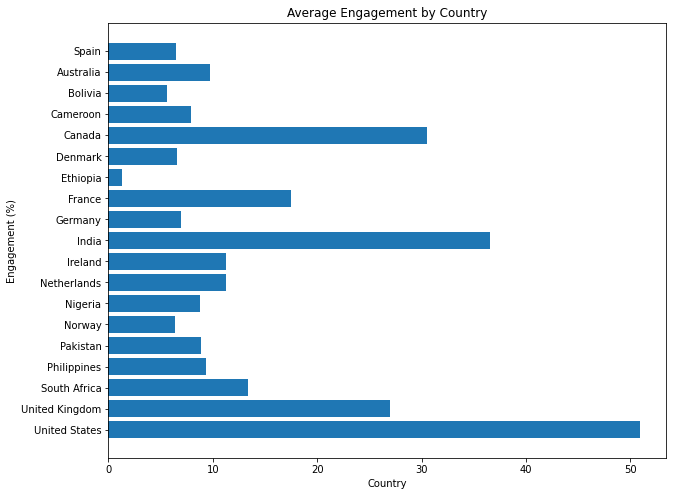

In [14]:
# Calculate the average engagement for each country
avg_engagement = df.mean()

# Create a bar chart of the average engagement levels by country
plt.figure(figsize=(10, 8))
plt.barh(countries, avg_engagement)
# plt.bar(df_monthly.mean().index, df_monthly.mean().values)
plt.title('Average Engagement by Country')
plt.xlabel('Country')
plt.ylabel('Engagement (%)')
plt.show()

In [15]:
# Identify the country with the highest engagement
highest_engagement = avg_engagement.idxmax()
print('The country with the highest engagement is:', highest_engagement)


The country with the highest engagement is: United States


#### Insights

1. The United States and India have the highest average engagement levels among the countries in the dataset, while Ethiopia and Bolivia have the lowest.
2. The difference in average engagement levels between the highest and lowest countries is quite large.
3. Most of the countries fall somewhere in lower region of engagement spectrum, with average engagement levels between 5% and 20%.

#### Recommendations

1. Given that the US and India have such high engagement levels, it may be worth examining their marketing strategies and content to see what is resonating with their audiences. Is it the type of content being posted, or something else entirely? By understanding what is working well in these countries, other countries may be able to replicate their success.
2. On the other hand, Ethiopia and Bolivia have much lower engagement levels, so it may be worth looking into why this is the case. Are there cultural or language barriers that need to be addressed? Are the horoscopes not as relevant or interesting to these audiences? By understanding the reasons behind low engagement, efforts can be made to improve it.
3. For the countries in the middle of the engagement spectrum, it may be worth examining what types of content or themes are resonating most with their audiences, and tailoring future horoscopes accordingly. Additionally, efforts can be made to improve engagement through strategies like increasing the frequency of posts or experimenting with different advertising and marketing strategies.

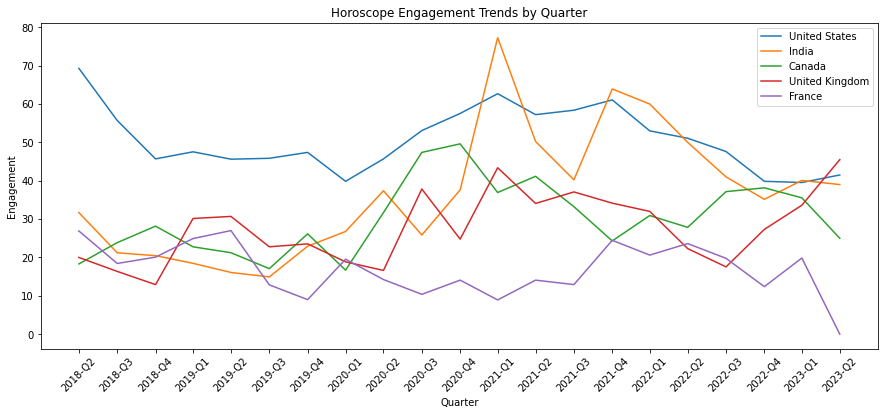

In [16]:
df_q = df.resample('Q').mean()

top_countries = df.mean().sort_values(ascending=False)[:5].index.tolist()

fig, ax = plt.subplots(figsize=(15, 6))

for country in top_countries:
    ax.plot(df_q.index, df_q[country], label=country)

ax.legend()
ax.set_xlabel('Quarter')
ax.set_ylabel('Engagement')
ax.set_title('Horoscope Engagement Trends by Quarter')
ax.set_xticks(df_q.index)
ax.set_xticklabels([d.strftime('%Y-Q') + str(d.quarter) for d in df_q.index])

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)
plt.show()

### Insights:



1. The engagement levels for all countries seem to be fluctuating over time, with some periods of higher engagement and some periods of lower engagement.
2. The engagement level for the United States is generally higher than the other countries, with a peak in engagement around early-2021 and a decline in engagement towards the end of 2022.
3. The engagement levels for the United Kingdom and South Africa are relatively stable over time, with some minor fluctuations.

### Recommendations:

1. For the United States, the peak in engagement in early-2021 could be analyzed to identify what content or campaigns contributed to this increase, and similar strategies could be employed in the future to boost engagement.
2. For the United Kingdom, Canada and India, where engagement levels are relatively stable, horoscope.com could focus on retaining and engaging with their current audience rather than seeking to attract new users.
3. For France, where engagement levels are more volatile, horoscope.com could consider implementing targeted campaigns or content to try to increase engagement and stabilize trends over time.
4. Overall, the line chart highlights the importance of understanding and monitoring user engagement over time to inform marketing and content strategies, and to ensure the long-term success and growth of horoscope.com in each country.

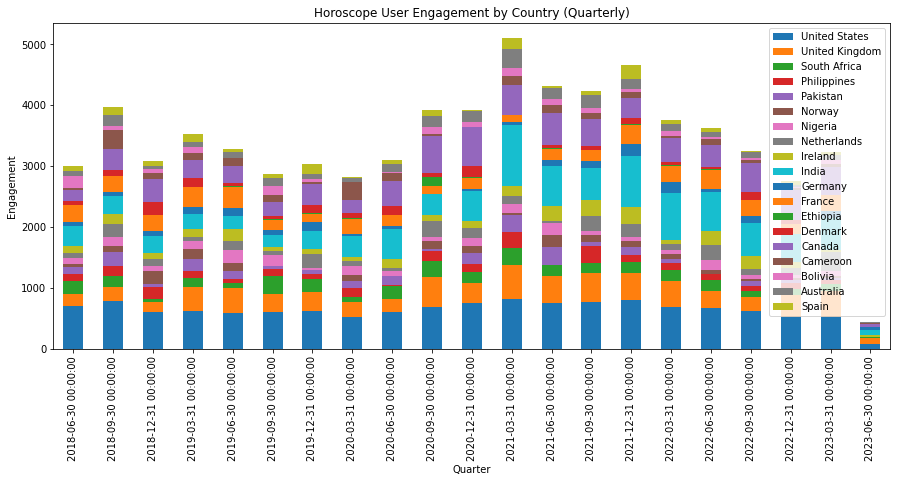

In [17]:
# resample the data by quarter and sum the values
df_quarterly = df.resample('Q').sum()

# create a stacked bar chart
# plt.figure(figsize=(16,6))
plt.rcParams['figure.figsize'] = [15, 6]
df_quarterly.plot(kind='bar', stacked=True)

# set the title and axis labels
plt.title('Horoscope User Engagement by Country (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Engagement')

# show the plot
plt.show()

### Insights

From the chart, we can see that the United States has consistently had the highest engagement levels over the quarters, followed by India and Canada. Ethiopia and Bolivia have had relatively lower engagement levels compared to the top three countries.

The chart also shows some interesting trends over time. For example, the engagement levels in the United States and India have generally been increasing over the quarters, while the levels in the United Kingdom have been fluctuating. On the other hand, engagement levels in South Africa and the Philippines have been relatively stable over time.

### Recommendations

1. Focus on user engagement in the top three countries (United States, Canada, and India), as they have consistently shown high engagement levels over the years.

2. Monitor engagement levels in Ethiopia and Bolivia and try to identify factors that may be impacting their engagement levels.

3. Consider implementing targeted marketing campaigns in countries with lower engagement levels to try and increase user engagement.

4. Keep track of the engagement trends over time and use this information to inform marketing and content strategies.

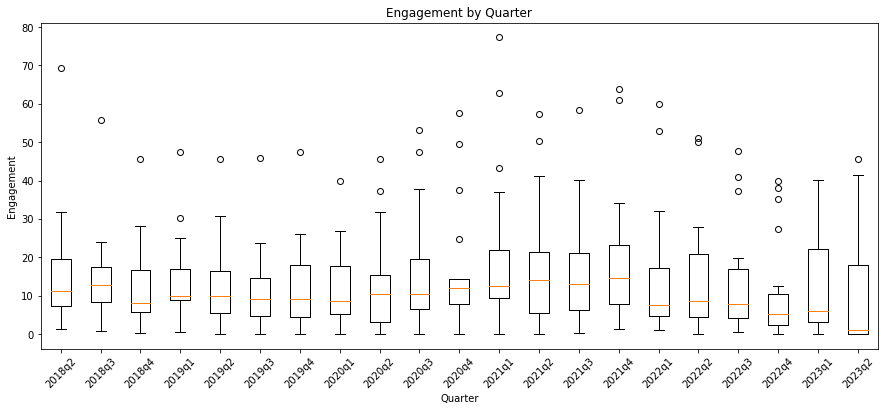

In [18]:
# Group by quarter
df_quarterly = df.resample('Q').mean()

# Create boxplot
plt.figure(figsize=(15,6))
plt.boxplot(df_quarterly.values.T, labels=df_quarterly.index.to_period('Q').strftime('%Yq%q'))
plt.title('Engagement by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Engagement')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)
plt.show()

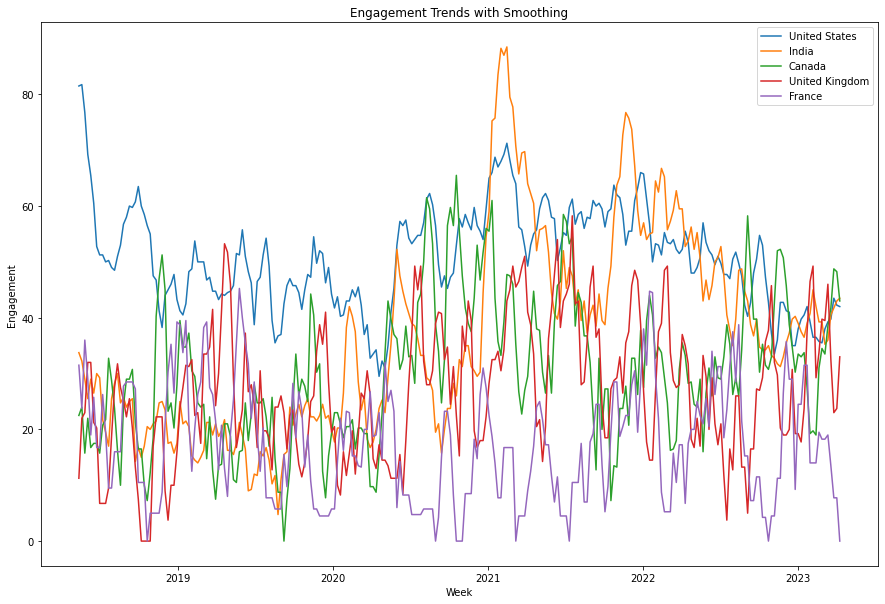

In [19]:
# Compute rolling average with window size of 4 weeks
rolling_avg = df.rolling(window=4).mean()

top_countries = df.mean().sort_values(ascending=False)[:5].index.tolist()

# Create line chart with smoothed data
plt.figure(figsize=(15,10))
for col in top_countries:
    plt.plot(rolling_avg.index, rolling_avg[col], label=col)
plt.title('Engagement Trends with Smoothing')
plt.xlabel('Week')
plt.ylabel('Engagement')
plt.legend()
plt.show()

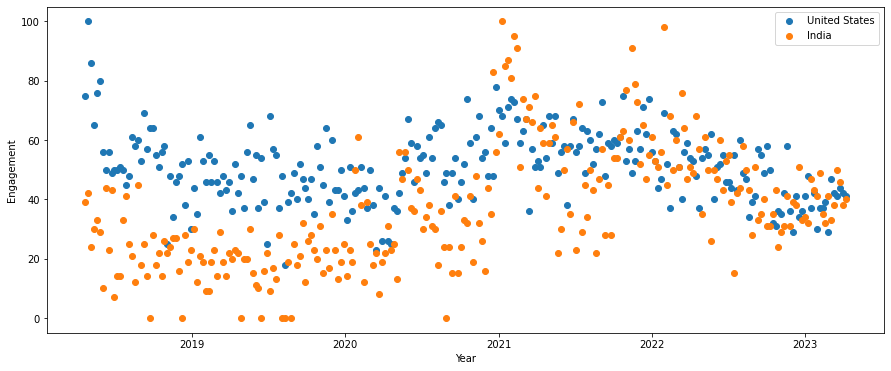

In [20]:
# get top 2 countries by average engagement
top_countries = df.mean().sort_values(ascending=False).head(2).index.tolist()

# create scatter plot
plt.scatter(df.index, df[top_countries[0]], label=top_countries[0])
plt.scatter(df.index, df[top_countries[1]], label=top_countries[1])

# add labels and legend
plt.xlabel('Year')
plt.ylabel('Engagement')
plt.legend()

# show plot
plt.show()

### Insights

1. Based on the scattered plot, there seems to be a positive correlation between the engagement levels of the United States and India. This suggests that the engagement levels in these two countries are closely related and that they may share similar user behaviors or preferences.

2. However, it is important to note that the scatter plot does not indicate any causation between the two variables. Other factors, such as cultural similarities, economic conditions, or language may also play a role in the similarities between engagement levels in the two countries.

3. Recommendation based on the scattered plot could be to conduct further research to identify the specific factors driving the similarities in user engagement between the United States and India. This could include analyzing user demographics, studying user behavior patterns, or conducting surveys to gain more insight into the preferences and interests of users in these countries.

4. Overall, the scattered plot provides a useful visualization for identifying patterns and correlations in the data, but it should always be used in conjunction with other analytical methods and techniques to draw meaningful conclusions and insights.

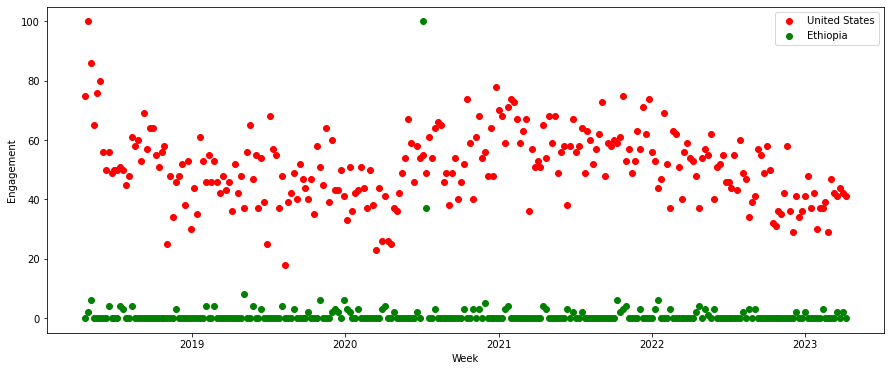

In [21]:
# get top and bottom 2 countries by average engagement
top_countries = df.mean().sort_values(ascending=False).head(1).index.tolist()
bottom_countries = df.mean().sort_values().head(1).index.tolist()

# create scatter plot
plt.scatter(df.index, df[top_countries[0]], label=top_countries[0], color='red')
# plt.scatter(df.index, df[top_countries[1]], label=top_countries[1], color='blue')
plt.scatter(df.index, df[bottom_countries[0]], label=bottom_countries[0], color='green')
# plt.scatter(df.index, df[bottom_countries[1]], label=bottom_countries[1], color='purple')

# add labels and legend
plt.xlabel('Week')
plt.ylabel('Engagement')
plt.legend()

# show plot
plt.show()